In [23]:
from typing_extensions import TypedDict
from typing import Literal

class TypeDictState(TypedDict):
    name:str
    game:Literal["cricket","football"]
    

In [24]:
def play_game(state:TypeDictState):
    print("----Play Game node has been called----")
    return {"name":state["name"] + " wants to play "}

def cricket(state:TypeDictState):
    print("----Cricket node has been called----")
    return {"name":state["name"] + "cricket","game":"cricket"}

def football(state:TypeDictState):
    print("----football node has been called----")
    return {"name":state["name"] + "football","game":"football"}

In [25]:
import random

In [26]:
def decide_game(state:TypeDictState)-> Literal["cricket","football"]:
    if random.random() < 0.5:
        return "cricket"
    else:
        return "football"

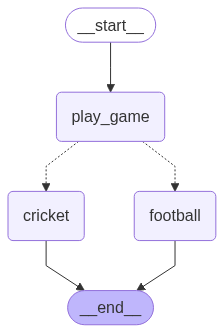

In [27]:
from IPython.display import Image,display
from langgraph.graph import StateGraph,START,END

builder=StateGraph(TypeDictState)
builder.add_node("play_game",play_game)
builder.add_node("cricket",cricket)
builder.add_node("football",football)

builder.add_edge(START,"play_game")
builder.add_conditional_edges("play_game",decide_game)
builder.add_edge("cricket",END)
builder.add_edge("football",END)


graph_builder=builder.compile()

display(Image(graph_builder.get_graph().draw_mermaid_png()))

In [29]:
graph_builder.invoke({"name":"bhupen"})

----Play Game node has been called----
----Cricket node has been called----


{'name': 'bhupen wants to play cricket', 'game': 'cricket'}

In [35]:
from dataclasses import dataclass

@dataclass
class DataClassState:
    name:str
    game:Literal["cricket","football"]

In [40]:
def play_game(state:DataClassState):
    print("----Play Game node has been called----")
    return {"name":state.name + " wants to play "}

def cricket(state:DataClassState):
    print("----Cricket node has been called----")
    return {"name":state.name + "cricket","game":"cricket"}

def football(state:DataClassState):
    print("----football node has been called----")
    return {"name":state.name + "football","game":"football"}

In [41]:
def decide_game(state:DataClassState)-> Literal["cricket","football"]:
    if random.random() < 0.5:
        return "cricket"
    else:
        return "football"

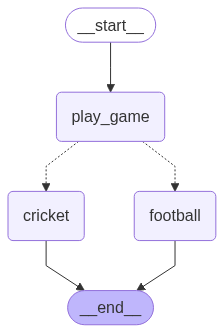

In [42]:
from IPython.display import Image,display
from langgraph.graph import StateGraph,START,END

builder=StateGraph(DataClassState)
builder.add_node("play_game",play_game)
builder.add_node("cricket",cricket)
builder.add_node("football",football)

builder.add_edge(START,"play_game")
builder.add_conditional_edges("play_game",decide_game)
builder.add_edge("cricket",END)
builder.add_edge("football",END)


graph_builder=builder.compile()

display(Image(graph_builder.get_graph().draw_mermaid_png()))

In [46]:
graph_builder.invoke(DataClassState(name="bhupen",game="cricket"))

----Play Game node has been called----
----Cricket node has been called----


{'name': 'bhupen wants to play cricket', 'game': 'cricket'}